<a href="https://colab.research.google.com/github/aryan0506/california_home_prediction/blob/main/second_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()


In [3]:
type(california_housing)

sklearn.utils._bunch.Bunch

In [4]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

# **Get discription of Data**

In [5]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
print(california_housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(california_housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# **Preparing Dataset**

In [9]:
import pandas as pd

In [12]:
dataset = pd.DataFrame(california_housing.data , columns= california_housing.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# **Here in this dataset there is not target variable now add it**

In [13]:
dataset['target'] = california_housing.target
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# **Now making quick analysis of dataset**

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# **get discription of function with discribe function**

In [16]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Check the missing values**

In [18]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


# **Exploratory data Analysis**
## **correlation**

In [19]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


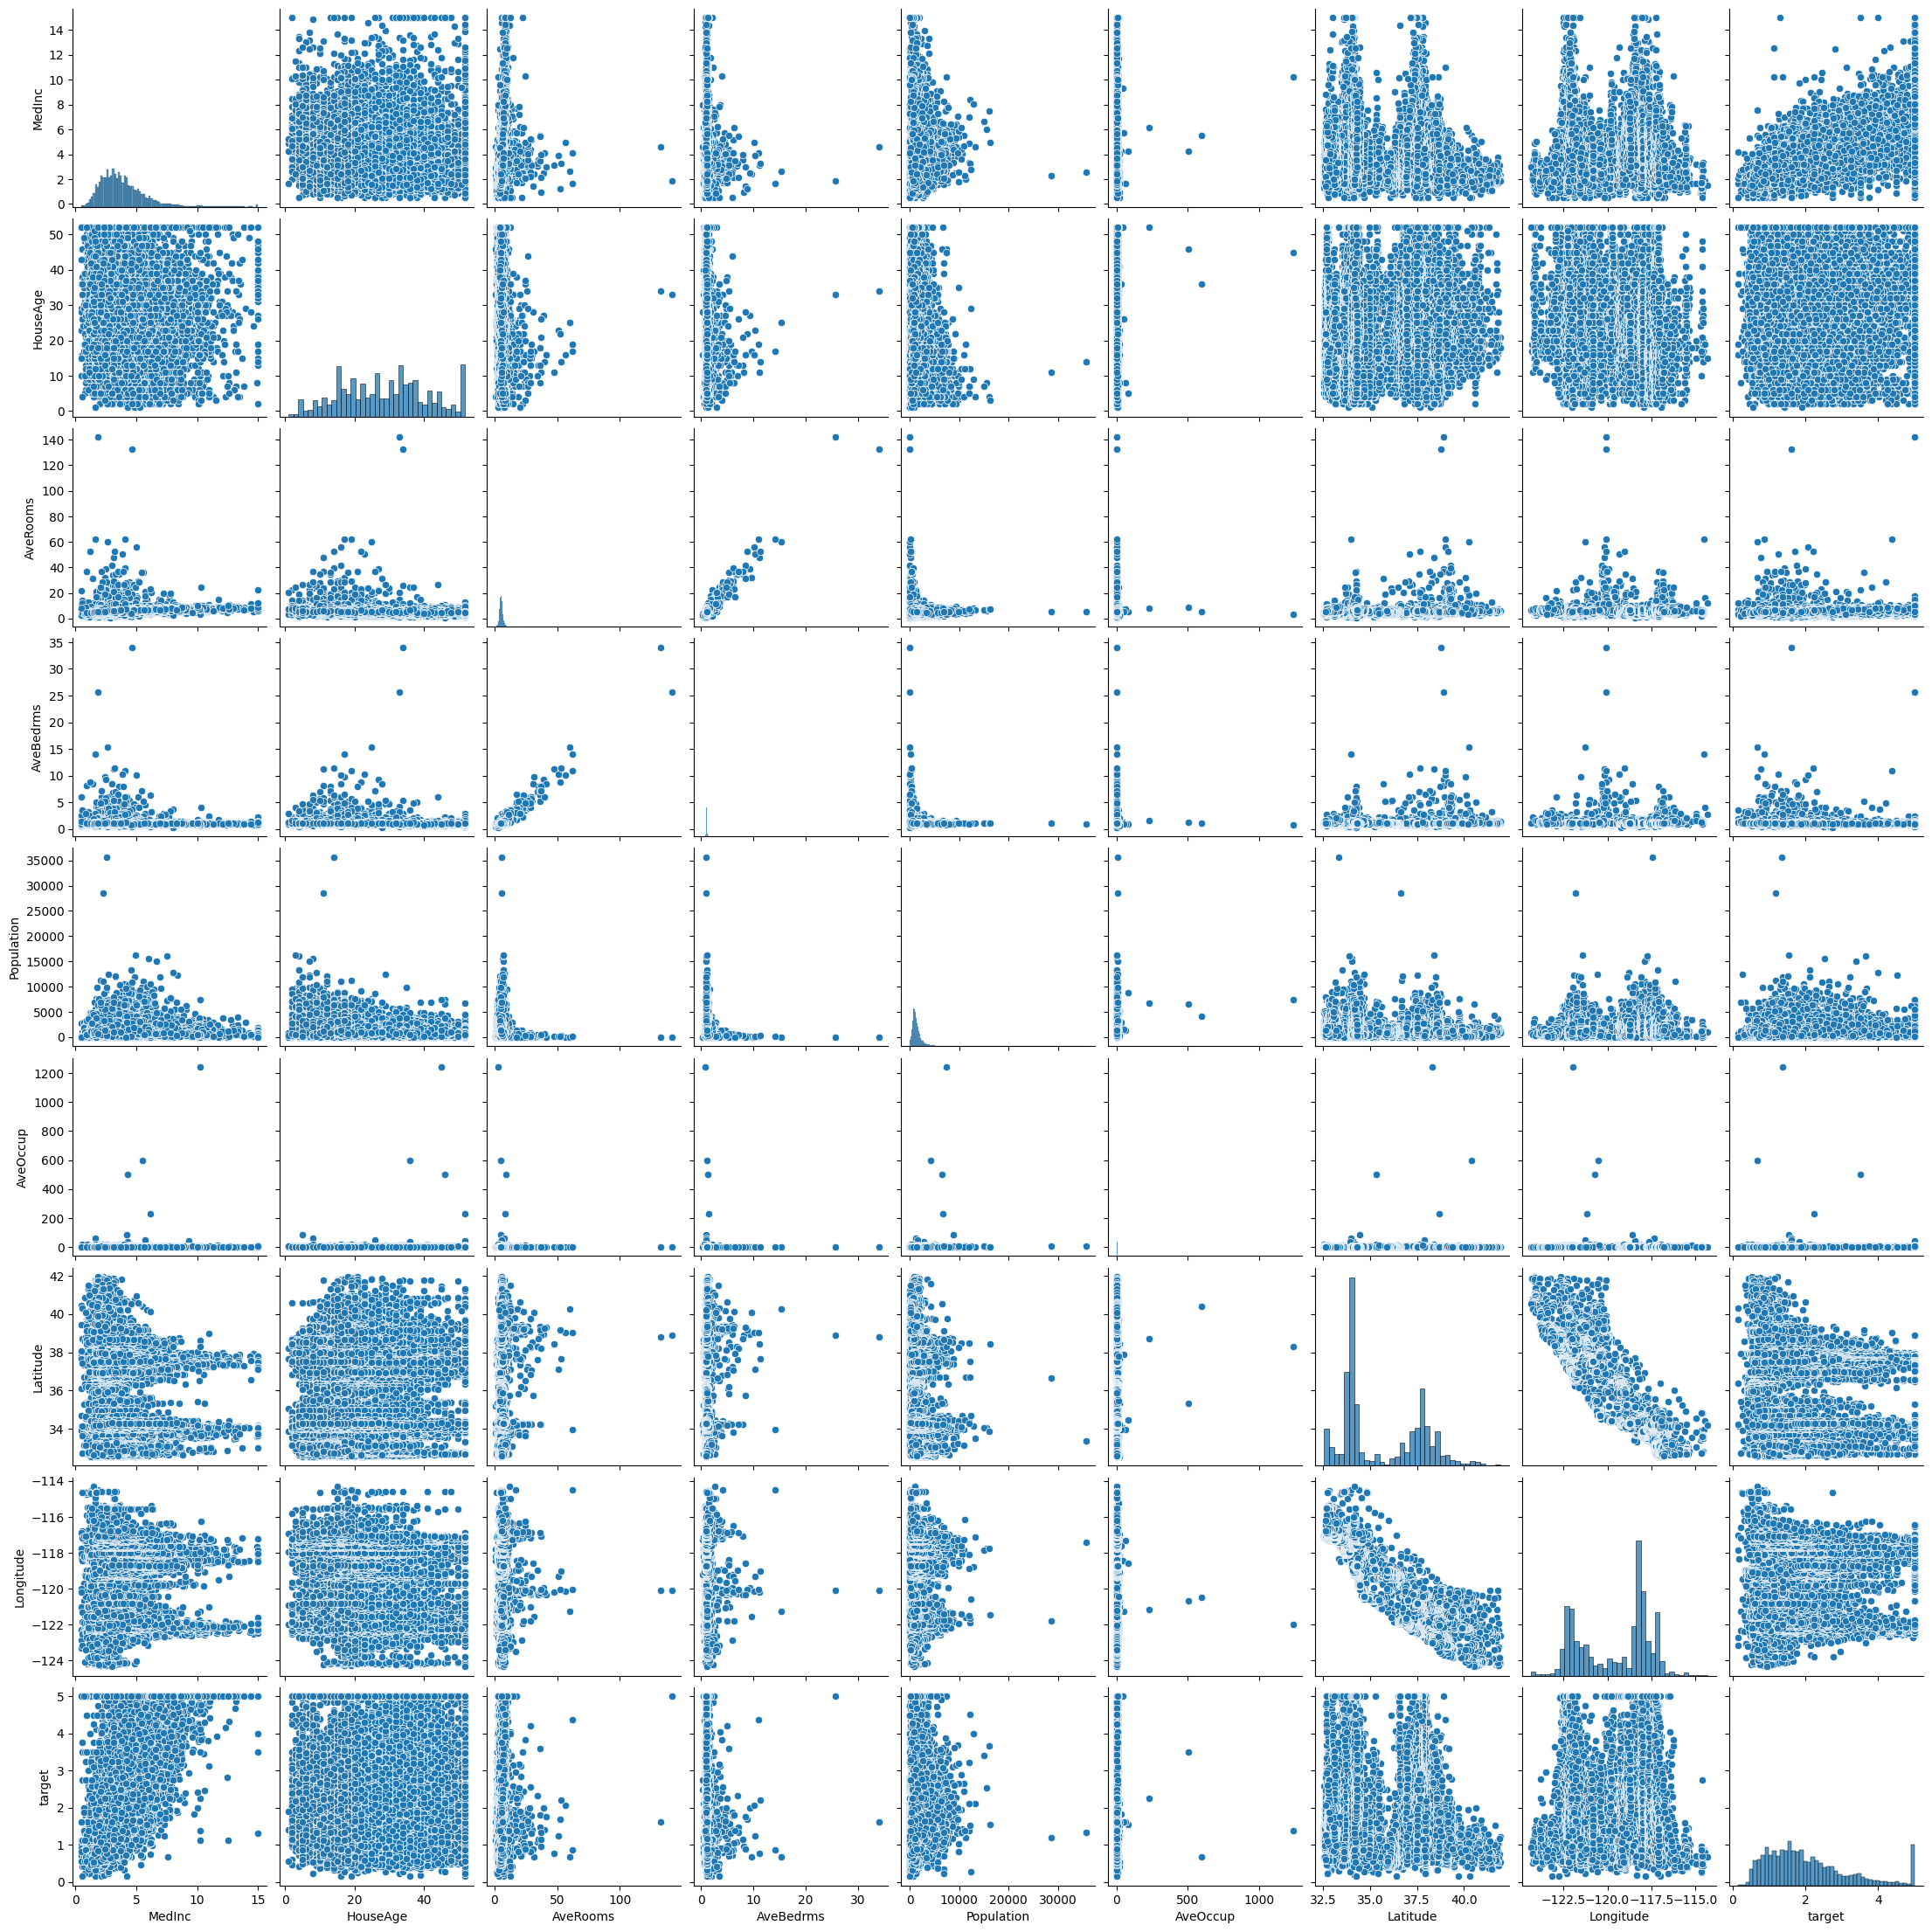

In [20]:
import seaborn as sns
sns.pairplot(dataset)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'target')

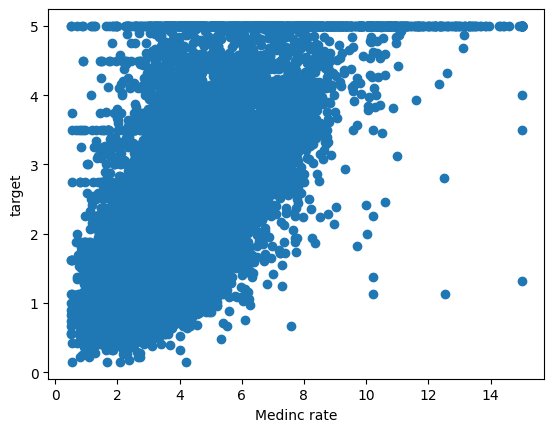

In [22]:
plt.scatter(dataset['MedInc'],dataset['target'])
plt.xlabel("Medinc rate")
plt.ylabel("target")

<Axes: xlabel='HouseAge', ylabel='target'>

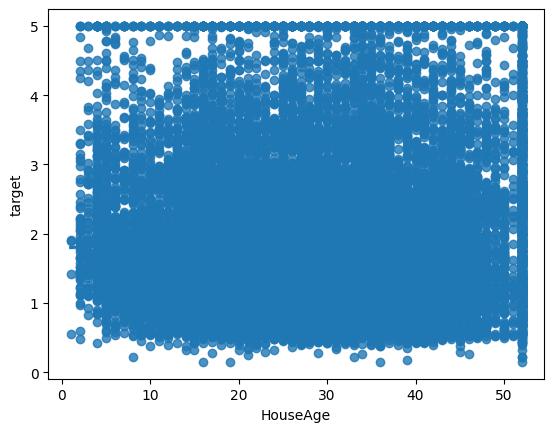

In [23]:
import seaborn as sns
sns.regplot(x = "HouseAge", y = "target" , data = dataset)

<Axes: xlabel='AveRooms', ylabel='target'>

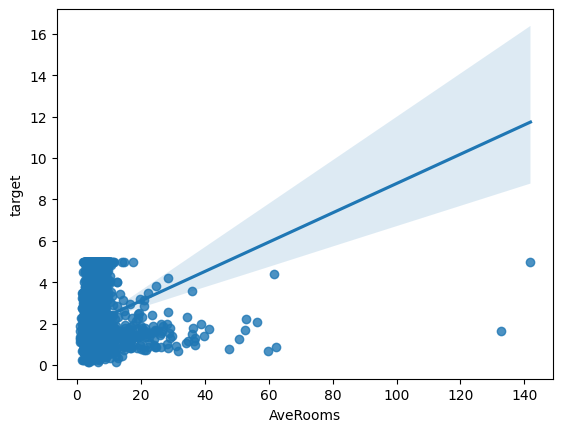

In [24]:
sns.regplot(x = "AveRooms", y = "target" , data = dataset)

<Axes: xlabel='AveBedrms', ylabel='target'>

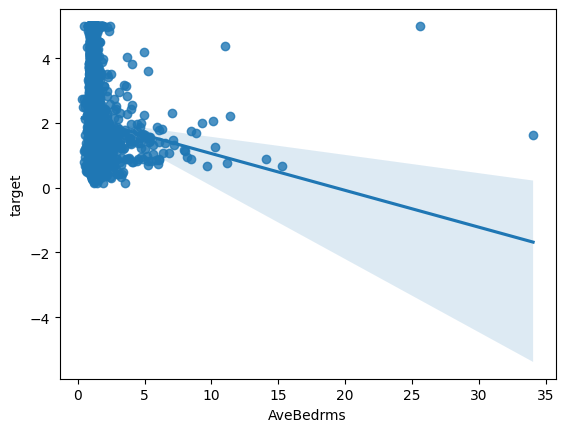

In [25]:
sns.regplot(x = "AveBedrms", y = "target" , data = dataset)

<Axes: xlabel='Population', ylabel='target'>

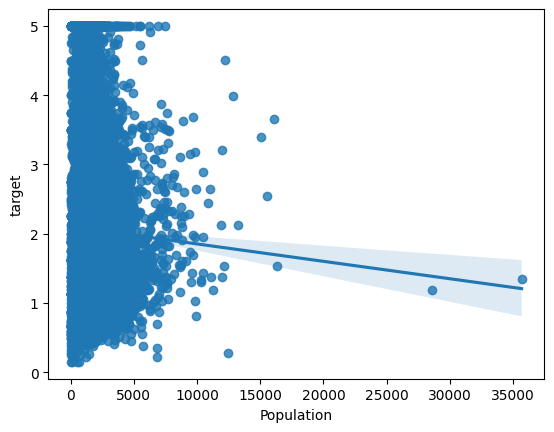

In [27]:
sns.regplot(x = "Population", y = "target" , data = dataset)

<Axes: xlabel='AveOccup', ylabel='target'>

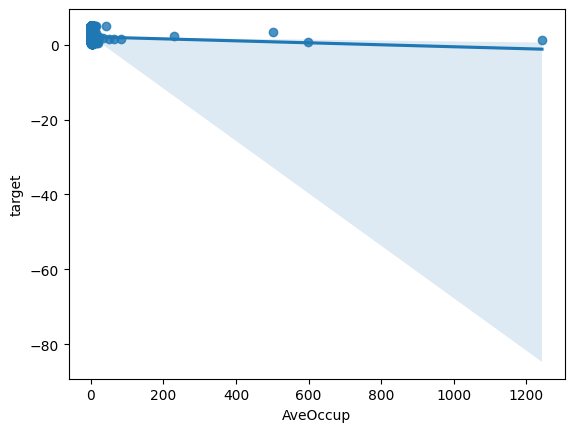

In [28]:
sns.regplot(x = "AveOccup", y = "target" , data = dataset)

<Axes: xlabel='Latitude', ylabel='target'>

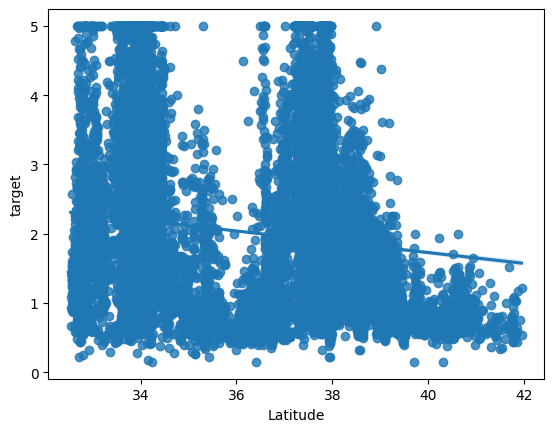

In [29]:
sns.regplot(x = "Latitude", y = "target" , data = dataset)

<Axes: xlabel='Longitude', ylabel='target'>

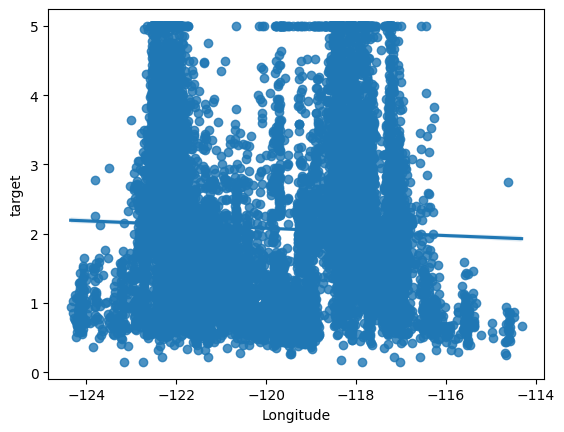

In [30]:
sns.regplot(x = "Longitude", y = "target" , data = dataset)

# **Independent and Dependent features**

In [31]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# **spliting target and dependent variable with iloc**

In [32]:
X = dataset.iloc[:,:-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
Y = dataset.iloc[:,-1]
Y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# **Train and test split**

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size= 0.3 , random_state = 100)

In [35]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3472,9.2873,26.0,7.772806,1.051635,1714.0,2.950086,34.29,-118.49
13593,1.4896,39.0,4.381616,1.164345,1258.0,3.504178,34.11,-117.28
3507,5.0947,33.0,5.778723,1.051064,738.0,3.140426,34.26,-118.46
6780,3.4559,39.0,4.645783,1.044578,1847.0,2.225301,34.10,-118.15
8087,5.3096,47.0,5.588095,1.040476,1219.0,2.902381,33.81,-118.20
...,...,...,...,...,...,...,...,...
16304,10.0088,15.0,7.738854,1.003185,1016.0,3.235669,38.01,-121.37
79,2.0114,38.0,4.412903,1.135484,344.0,2.219355,37.80,-122.28
12119,5.6409,3.0,7.837746,1.083262,8437.0,3.602477,33.97,-117.21
14147,2.3812,35.0,6.289474,1.109649,753.0,3.302632,32.74,-117.08


In [36]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8151,3.7031,36.0,6.276836,1.039548,444.0,2.508475,33.81,-118.10
53,1.2475,52.0,4.075000,1.140000,1162.0,2.905000,37.82,-122.27
3039,4.8266,13.0,6.746647,1.062593,2170.0,3.233979,35.37,-119.12
9484,2.8833,19.0,6.750000,1.348684,424.0,2.789474,39.31,-123.15
9307,2.8903,31.0,4.477459,1.073087,2962.0,2.023224,37.98,-122.52
...,...,...,...,...,...,...,...,...
11584,5.8914,26.0,5.938616,0.992188,2932.0,3.272321,33.79,-118.03
2767,2.0109,15.0,7.124542,1.963370,515.0,1.886447,33.40,-115.99
9481,2.3333,18.0,4.586992,1.021138,1636.0,2.660163,39.39,-123.34
2258,3.3272,35.0,5.073171,0.983740,1054.0,2.856369,36.79,-119.83


# **Standardize the dataset**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)


In [40]:
x_test = scaler.transform(x_test)

In [41]:
x_train

array([[ 2.84539971, -0.20916801,  0.90435423, ..., -0.01029732,
        -0.62613782,  0.53955999],
       [-1.25097582,  0.81895855, -0.40627304, ...,  0.03778133,
        -0.71012987,  1.14157044],
       [ 0.64289589,  0.3444386 ,  0.13368127, ...,  0.00621846,
        -0.64013649,  0.55448587],
       ...,
       [ 0.92983182, -2.02816115,  0.92945225, ...,  0.04631068,
        -0.77545703,  1.17639749],
       [-0.78259047,  0.50261192,  0.33107607, ...,  0.0202931 ,
        -1.34940275,  1.2410763 ],
       [ 0.3961478 ,  1.53073848, -0.10829074, ..., -0.01555667,
        -0.87811399,  0.63409055]])

In [42]:
x_test

array([[-0.08815508,  0.58169858,  0.32619191, ..., -0.048616  ,
        -0.85011664,  0.73359641],
       [-1.37815851,  1.84708511, -0.52477385, ..., -0.01420945,
         1.02103975, -1.34110076],
       [ 0.50205458, -1.23729457,  0.50776436, ...,  0.01433611,
        -0.12218547,  0.22611653],
       ...,
       [-0.80775384, -0.84186128, -0.3268992 , ..., -0.03545402,
         1.75363714, -1.87345711],
       [-0.2856271 ,  0.50261192, -0.13900077, ..., -0.0184292 ,
         0.54041853, -0.12712927],
       [-0.4375529 ,  0.3444386 ,  0.0276025 , ...,  0.10882592,
        -0.6961312 ,  0.80822581]])

# **Model training**

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train , y_train)

LinearRegression()

In [46]:
## print the coefficient and the intercept
print(lr.coef_)

[ 0.81766054  0.12105577 -0.25939102  0.30126989 -0.00472225 -0.04506838
 -0.90630718 -0.87807769]


In [47]:
print(lr.intercept_)

2.076233847591355


In [51]:
## on which parameters the model has been trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# **Prediction with test data**

In [52]:
x_test_pred= lr.predict(x_test)

In [53]:
x_test_pred

array([2.08692042, 1.58841091, 2.09217436, ..., 1.40836414, 1.4943646 ,
       1.75888592])

#**plot a scatter plot for the prediction**

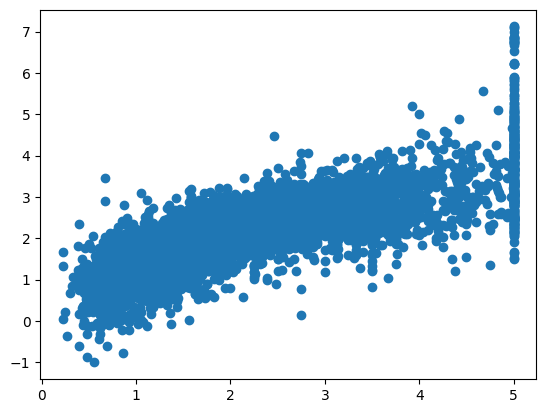

In [54]:
plt.scatter(y_test,x_test_pred)

In [55]:
# residuals
residuals = y_test - x_test_pred

In [56]:
residuals

,target
8151,0.366080
53,-0.546411
3039,-0.630174
9484,-0.049352
9307,1.192294
...,...
11584,-0.525033
2767,-0.345247
9481,-0.568364
2258,-0.838365


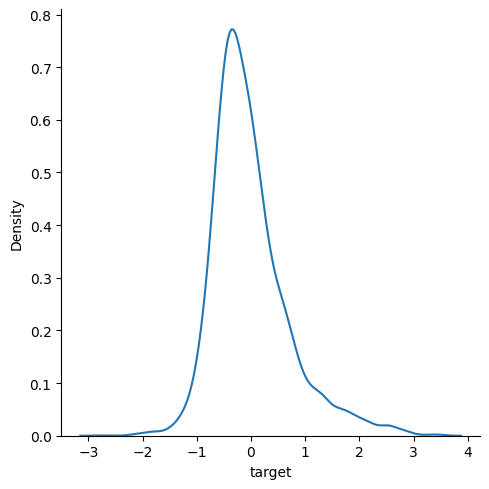

In [57]:
## ploting this residuals
sns.displot(residuals , kind = "kde")

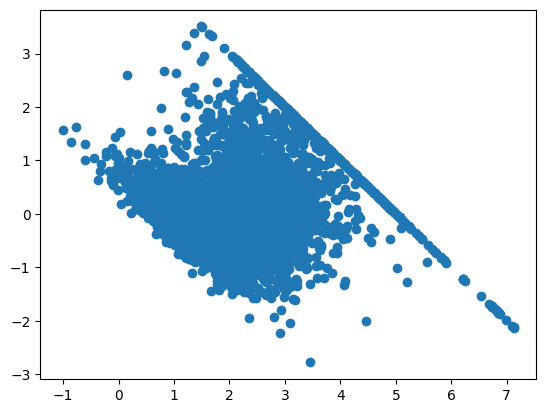

In [58]:
## scatter plot with respect to prediction and residual
plt.scatter(x_test_pred , residuals)

# **performance metrix**

In [60]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
print(mean_absolute_error(y_test , x_test_pred))
print (mean_squared_error(y_test , x_test_pred))

print(r2_score(y_test , x_test_pred))
#

0.5258541695643584
0.5004697085848049
0.6221318111480793


# **New data prediction**

In [65]:
california_housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [67]:
## transformation of new data
scaler.transform(california_housing.data[0].reshape(1,-1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33997851,  0.97713187,  0.59954571, -0.14979364, -0.96061957,
        -0.04453078,  1.0490371 , -1.32119959]])

In [78]:
lr.predict(scaler.transform(california_housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.12309356])

# **Pickling the model file for Deployment**

In [70]:
import pickle

In [72]:
pickle.dump(lr , open('regmodel.pkl', 'wb'))

In [76]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [77]:
pickled_model.predict(scaler.transform(california_housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.12309356])